In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_cleaning.data_cleaner import DataCleaner

print(tf.__version__)


2.16.2


# Linear Regression for Sea Level 1

**inputs**: Year, Country, Sea level rise, Average rainfall  
**output**: Average temperature

In [12]:
# Current working directory
current_directory = os.getcwd()

# Go up one directory to the root
root = os.path.abspath(os.path.join(current_directory, ".."))

# Get the path to the data
data_path = os.path.join(root, 'clean-data/processed_Sea_level_1_data.csv')

dc: DataCleaner = DataCleaner(data_path)
dc.preview(10)


,Year,Country,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm)
0,2000,Argentina,16.900000,4.000000,2047.000000
1,2000,Australia,11.933333,2.266667,2033.333333
2,2000,Brazil,31.200000,3.700000,803.000000
3,2000,Canada,19.300000,2.650000,1383.000000
4,2000,China,26.200000,2.200000,1849.000000
5,2000,France,16.600000,2.800000,1819.666667
6,2000,Germany,9.750000,1.450000,2641.000000
7,2000,India,21.250000,3.250000,1124.500000
8,2000,Indonesia,23.585714,3.242857,1781.428571
9,2000,Mexico,16.900000,1.200000,1974.500000


In [13]:
df_copy = dc.df.copy()

# One Hot Encode the country column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
country_encoded = encoder.fit_transform(dc.df[['Country']])
country_columns = encoder.get_feature_names_out(['Country'])

df_encoded = pd.concat([dc.df.drop(columns=['Country']), pd.DataFrame(country_encoded, columns=country_columns)], axis=1)
df_encoded

,Year,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm),Country_Argentina,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Indonesia,Country_Japan,Country_Mexico,Country_Russia,Country_South Africa,Country_UK,Country_USA
0,2000,16.900000,4.000000,2047.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,11.933333,2.266667,2033.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,31.200000,3.700000,803.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,19.300000,2.650000,1383.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,26.200000,2.200000,1849.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,2023,20.000000,2.750000,1772.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
336,2023,30.900000,3.300000,979.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
337,2023,19.600000,2.700000,1260.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
338,2023,30.300000,2.750000,1503.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Extract features and target
X = df_encoded["Year"].values.reshape(-1, 1)
X = np.hstack((X, df_encoded.drop(columns=["Avg Temperature (°C)", "Year"]).values))
Y = df_encoded["Avg Temperature (°C)"].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=X.shape[1], activation='linear')  # Linear Regression
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1600.4620 - val_loss: 111.2064
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.8273 - val_loss: 79.8917
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.6760 - val_loss: 58.1510
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.1539 - val_loss: 46.3480
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.0651 - val_loss: 39.9767
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.4648 - val_loss: 37.4194
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.9930 - val_loss: 34.3740
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.8326 - val_loss: 37.2676
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.6372 - val_loss: 35.0321
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.9504 - val_loss: 34.2406
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.2862 - val_loss: 33.2728
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━

In [18]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, Y_test)
print(f"Test Loss (MSE): {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 42.6549
Test Loss (MSE): 44.22658157348633


In [19]:
# Predict on the test set
Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[21.462664]
 [20.827871]
 [19.150259]
 [20.802935]
 [20.023222]
 [20.01278 ]
 [20.904257]
 [20.469173]
 [19.521336]
 [19.967268]
 [20.918934]
 [20.74276 ]
 [21.745153]
 [21.143137]
 [19.241098]
 [19.690174]
 [22.656548]
 [20.771667]
 [20.193966]
 [21.046093]
 [20.903845]
 [19.71473 ]
 [19.981064]
 [18.626717]
 [20.840443]
 [21.45627 ]
 [19.586428]
 [21.713331]
 [19.963413]
 [20.503222]
 [18.833302]
 [20.879955]
 [19.87984 ]
 [20.076187]
 [19.744184]
 [21.00383 ]
 [21.819235]
 [19.8527  ]
 [19.455894]
 [21.525906]
 [19.723925]
 [20.187206]
 [20.084139]
 [20.016073]
 [22.359913]
 [21.003744]
 [20.514353]
 [22.840563]
 [19.896536]
 [22.150549]
 [20.774319]
 [20.094442]
 [20.460728]
 [20.639475]
 [21.132824]
 [20.90522 ]
 [21.04239 ]
 [20.815207]
 [21.059418]
 [20.673002]
 [20.531757]
 [19.70687 ]
 [20.28174 ]
 [20.445436]
 [19.467222]
 [20.503494]
 [21.529926]
 [20.474752]]
[[33.3       ]
 [19.2       ]
 [12.05      ]
 [12.06666667]
 [21.9       ]
 [

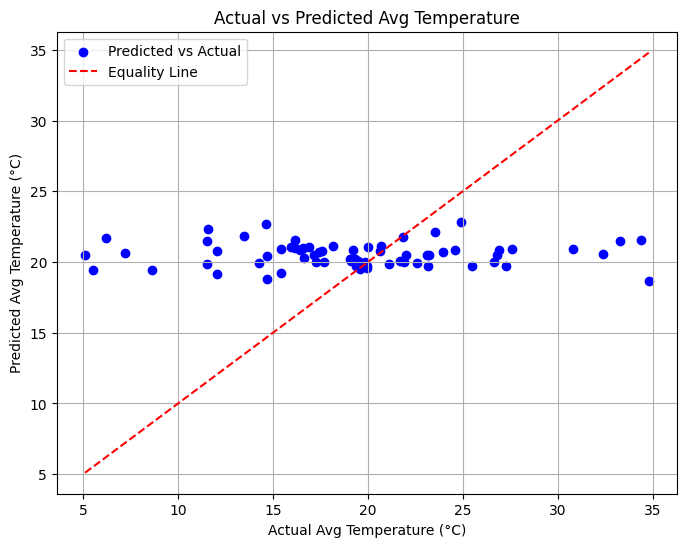

In [20]:
# Plotting Actual vs Predicted with a line of equality
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(Y_test, Y_pred, label='Predicted vs Actual', color='blue')

# Line of equality
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Equality Line')

# Labels and title
plt.xlabel('Actual Avg Temperature (°C)')
plt.ylabel('Predicted Avg Temperature (°C)')
plt.title('Actual vs Predicted Avg Temperature')

# Grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()